In [2]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from scipy.stats import shapiro, kstest, skew, expon
%matplotlib inline

# Exploratory Data Analysis

## Univariate Analysis

In [3]:
# try to fetch from a url
url = "https://github.com/Lazygeniusbilal/Exploratory-Data-Analysis-Insurance-/raw/main/Housing_Insurance.csv"
# Read the CSV file into a DataFrame
data = pd.read_csv(url)

  State  Building Age  Claim Frequency  Risk Score  Average Premium  \
0    TX            23                2          48             5000   
1    TX            23                2          48             5000   
2    TX            23                2          48             5000   
3    TX            23                2          48             5000   
4    TX            23                2          48             5000   

  Construction Type   Latitude  Longitude Incident Type  \
0              Wood  28.506500 -96.486833  Winter Storm   
1              Wood  30.231093 -89.759217          Fire   
2              Wood  30.811699 -89.810934          Fire   
3              Wood  33.556463 -91.227744          Fire   
4              Wood  29.341911 -91.341319  Winter Storm   

        Incident Begin Date         Incident End Date     Price  Beds  \
0  2023-01-30T00:00:00.000Z  2023-02-02T00:00:00.000Z  $310,999  4bed   
1  2022-07-18T00:00:00.000Z  2022-08-06T00:00:00.000Z   $79,900  5bed   

In [4]:
data.head(3)

,State,Building Age,Claim Frequency,Risk Score,Average Premium,Construction Type,Latitude,Longitude,Incident Type,Incident Begin Date,Incident End Date,Price,Beds,Baths,Area,Address
0,TX,23,2,48,5000,Wood,28.506500,-96.486833,Winter Storm,2023-01-30T00:00:00.000Z,2023-02-02T00:00:00.000Z,"$310,999",4bed,2bath,"1,700sqft","8650 Jetty Glen DrCypress, TX 77433"
1,TX,23,2,48,5000,Wood,30.231093,-89.759217,Fire,2022-07-18T00:00:00.000Z,2022-08-06T00:00:00.000Z,"$79,900",5bed,2bath,"3,810sqft","9831 Cliffside Ridge DrBaytown, TX 77521"
2,TX,23,2,48,5000,Wood,30.811699,-89.810934,Fire,2018-05-02T00:00:00.000Z,2018-05-14T00:00:00.000Z,"$310,999",2bed,2.5bath,"1,216sqft","620 Hallwood DrLiberty Hill, TX 78642"


In [5]:
data.isnull().sum()

State                  0
Building Age           0
Claim Frequency        0
Risk Score             0
Average Premium        0
Construction Type      0
Latitude               0
Longitude              0
Incident Type          0
Incident Begin Date    0
Incident End Date      0
Price                  0
Beds                   0
Baths                  0
Area                   0
Address                0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

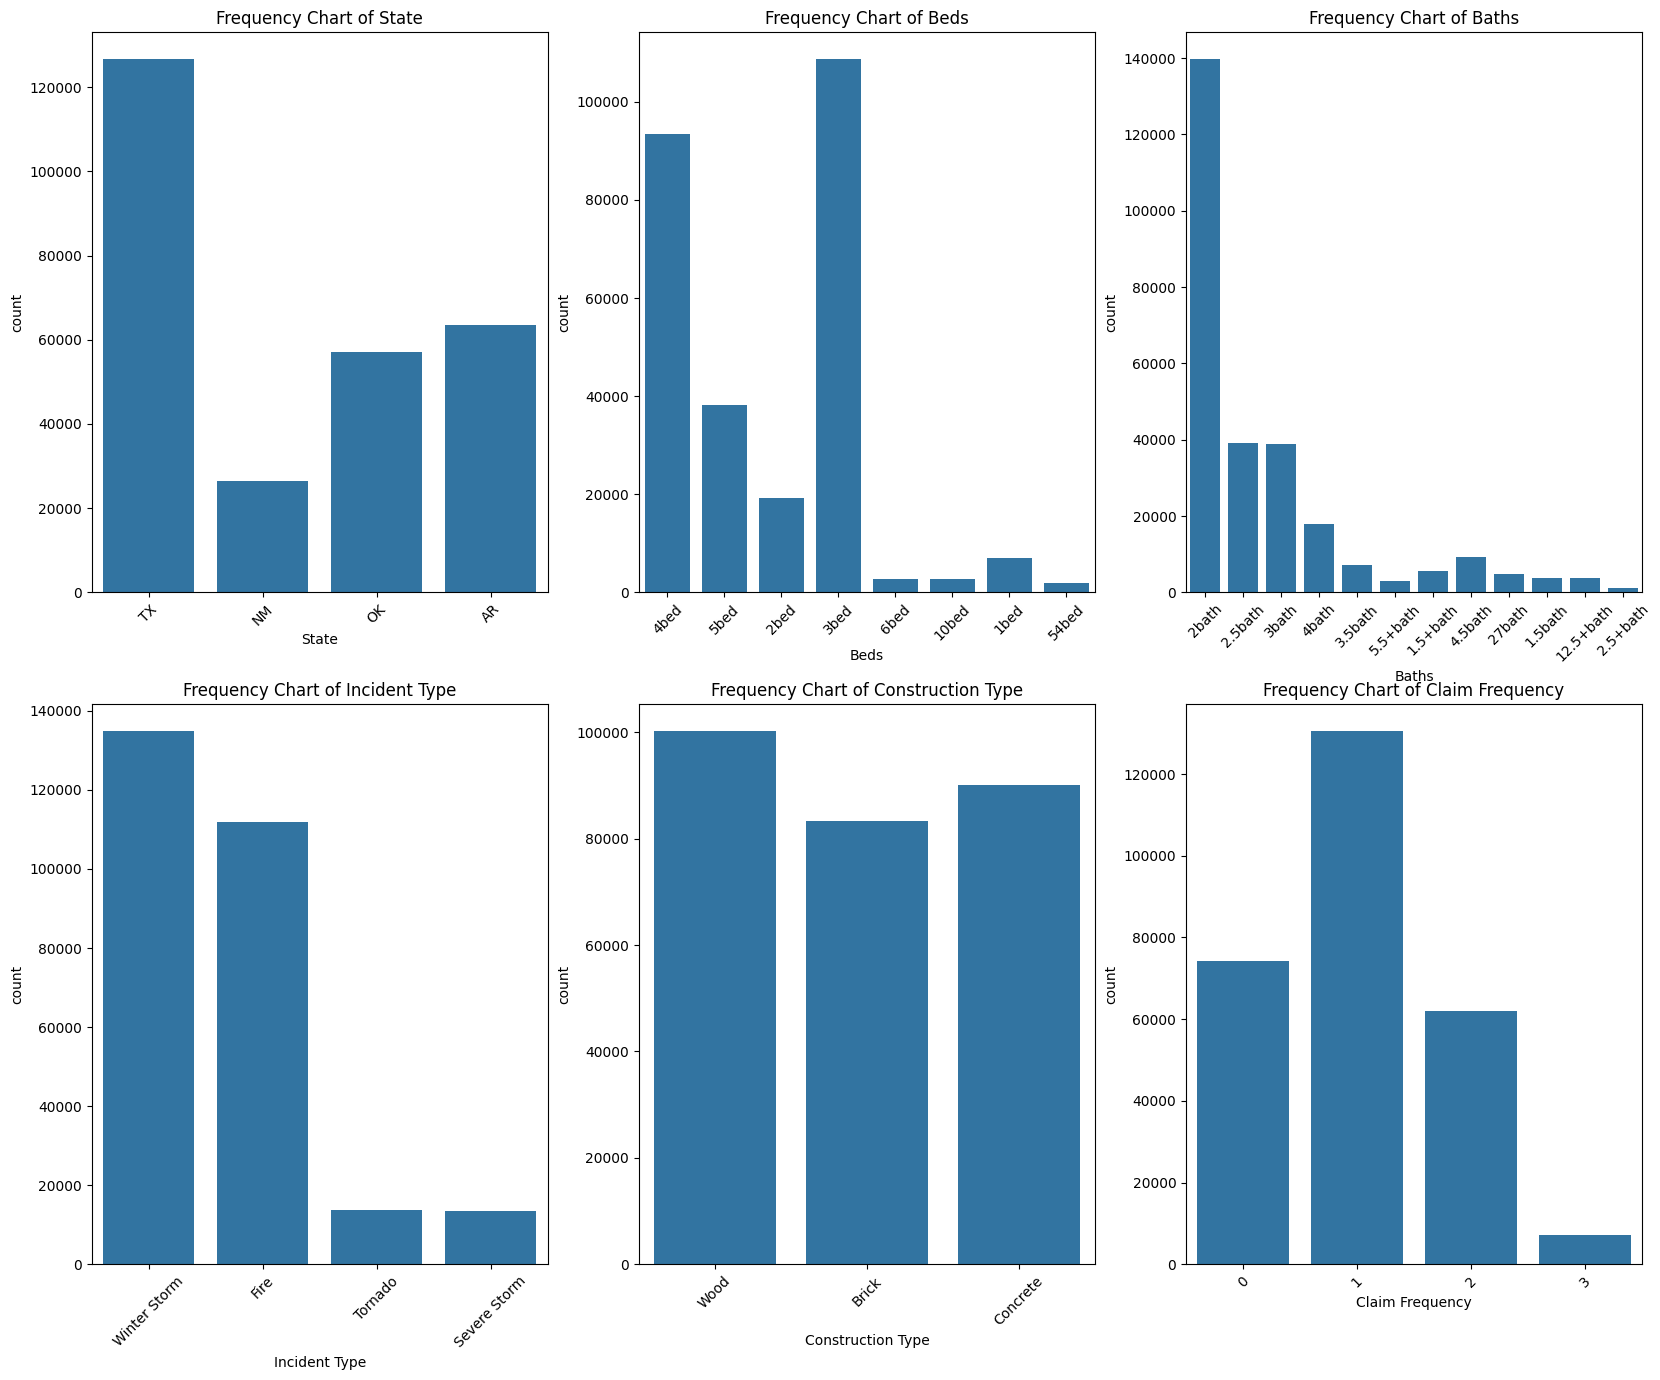

In [7]:
cat_cols = ["State", "Beds", "Baths", "Incident Type", "Construction Type", "Claim Frequency"]
fig , ax = plt.subplots(ncols=3, nrows=2, figsize=(20,16))
ax = ax.flatten()

for index, column in enumerate(cat_cols):
    sns.countplot(data=data, x=column, ax=ax[index])
    ax[index].set_title(f"Frequency Chart of {column}")
    ax[index].tick_params(axis="x", rotation=45)
plt.show()

### Frequency Graphs:
- Texas state is in higher frequency.
- Mostly houses are 3 bedroom houses.
- Maximum houses has 2 bathrooms.
- Mostly Winter Storm Occurs.
- Wood Material is mostly used in house construction.
- Maximum claims are done once.

**Most of the Features look Imbalanced.**

In [8]:
# Step 1: Remove the dollar sign and split
data["Price"] = data["Price"].str.split("$").str[-1]

# Step 2: Remove commas
data["Price"] = data["Price"].str.replace(",", "")

# Step 3: Convert the column to an integer type
data["Price"] = data["Price"].astype("int64")

In [9]:
# Extract the area in number
data["Area"] = data["Area"].str.split("s").str[0]

# Replace the , with nothing
data["Area"] = data["Area"].str.replace(",", "")

#convert the datatype of the area
data["Area"] = data["Area"].astype("int64")

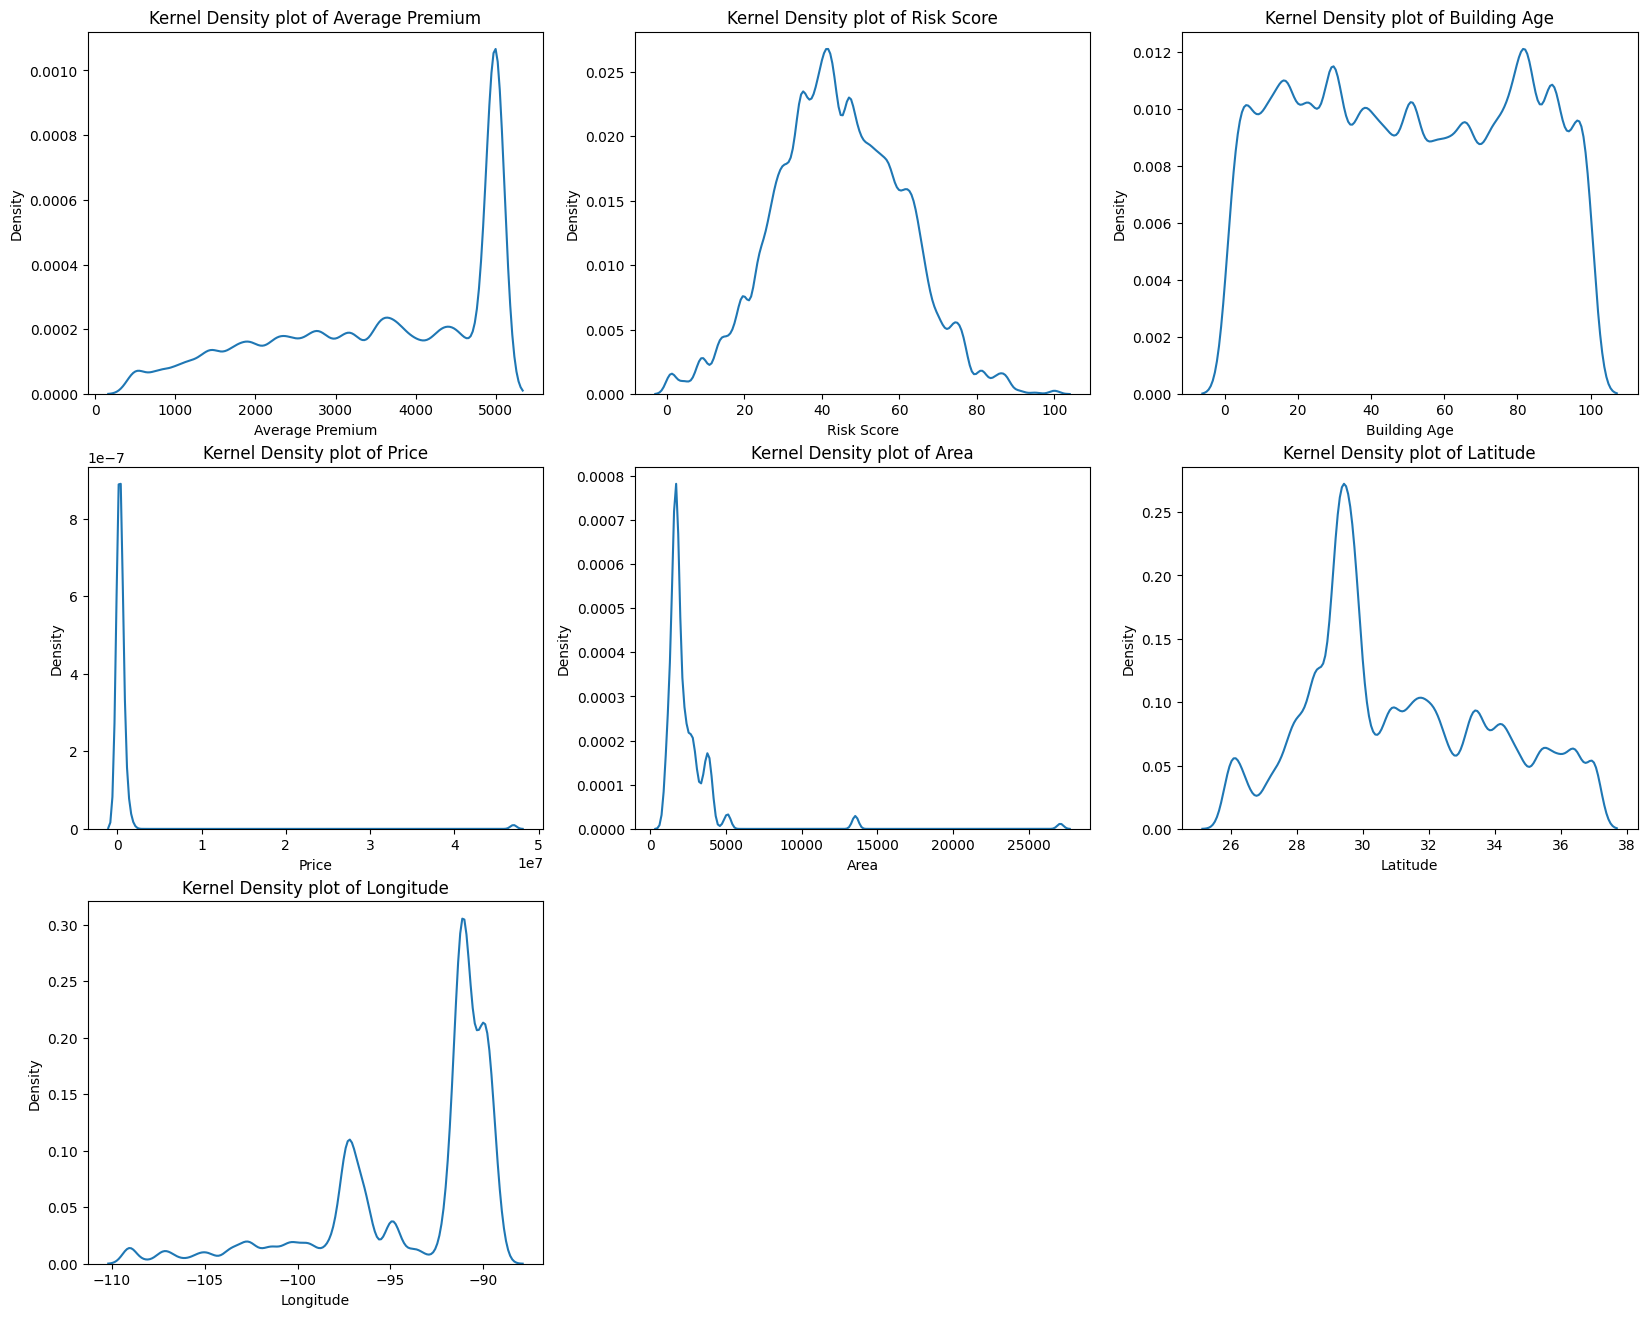

In [10]:
num_cols = ["Average Premium", "Risk Score", "Building Age", "Price", "Area", "Latitude", "Longitude"]
fig , ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16))
ax = ax.flatten()

for index, column in enumerate(num_cols):
    sns.kdeplot(data=data, x=column, ax=ax[index])
    ax[index].set_title(f"Kernel Density plot of {column}")
    
if len(num_cols) < len(ax):
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

plt.show()

##### Risk Score is seems normal while Building Age looks uniform while others looks skewed

In [11]:
# Lets check via pythonic way 

# store column name as key and distribution as value
distribution_types = {}

for column in num_cols:
    data_col = data[column]

    # 1. check normal distibution via shaprio wilk test
    stat, p_value_normal = shapiro(data_col)
    # 2. check for normal distribution
    d_stat_uniform, p_value_uniform = kstest(data_col, 'uniform', args=(data_col.min(), data_col.max() - data_col.min()))
    # 3. check for exponential distribution
    d_stat_exp, p_value_exp = kstest(data_col, 'expon', args=(data_col.min(), np.mean(data_col)))
    # 4. check for skewness
    skewness = skew(data_col)

    # Classify the distribution
    if p_value_normal > 0.05:
        distribution_types[column] = "Normal Distribution"
    elif p_value_uniform > 0.05:
        distribution_types[column] = "Uniform Distribution"
    elif p_value_exp > 0.05:
        distribution_types[column] = "Exponential Distribution"
    elif skewness > 0:
        distribution_types[column] = "Right-Skewed Distribution"
    elif skewness < 0:
        distribution_types[column] = "Left-Skewed Distribution"
    else:
        distribution_types[column] = "Unknown/Complex Distribution"

# Print the determined distribution types
dist_df = pd.DataFrame(list(distribution_types.items()), columns=["column", "distribution_types"])

dist_df

c:\Users\ba415\OneDrive\Desktop\Bilal ML Projects\FEMA-DISASTER-DATASET\Exploratory-Data-Analysis-Insurance-\myvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 273770.
  res = hypotest_fun_out(*samples, **kwds)


,column,distribution_types
0,Average Premium,Left-Skewed Distribution
1,Risk Score,Right-Skewed Distribution
2,Building Age,Right-Skewed Distribution
3,Price,Right-Skewed Distribution
4,Area,Right-Skewed Distribution
5,Latitude,Right-Skewed Distribution
6,Longitude,Left-Skewed Distribution


##### Via pythonic way it seems that all are skewed somehow.

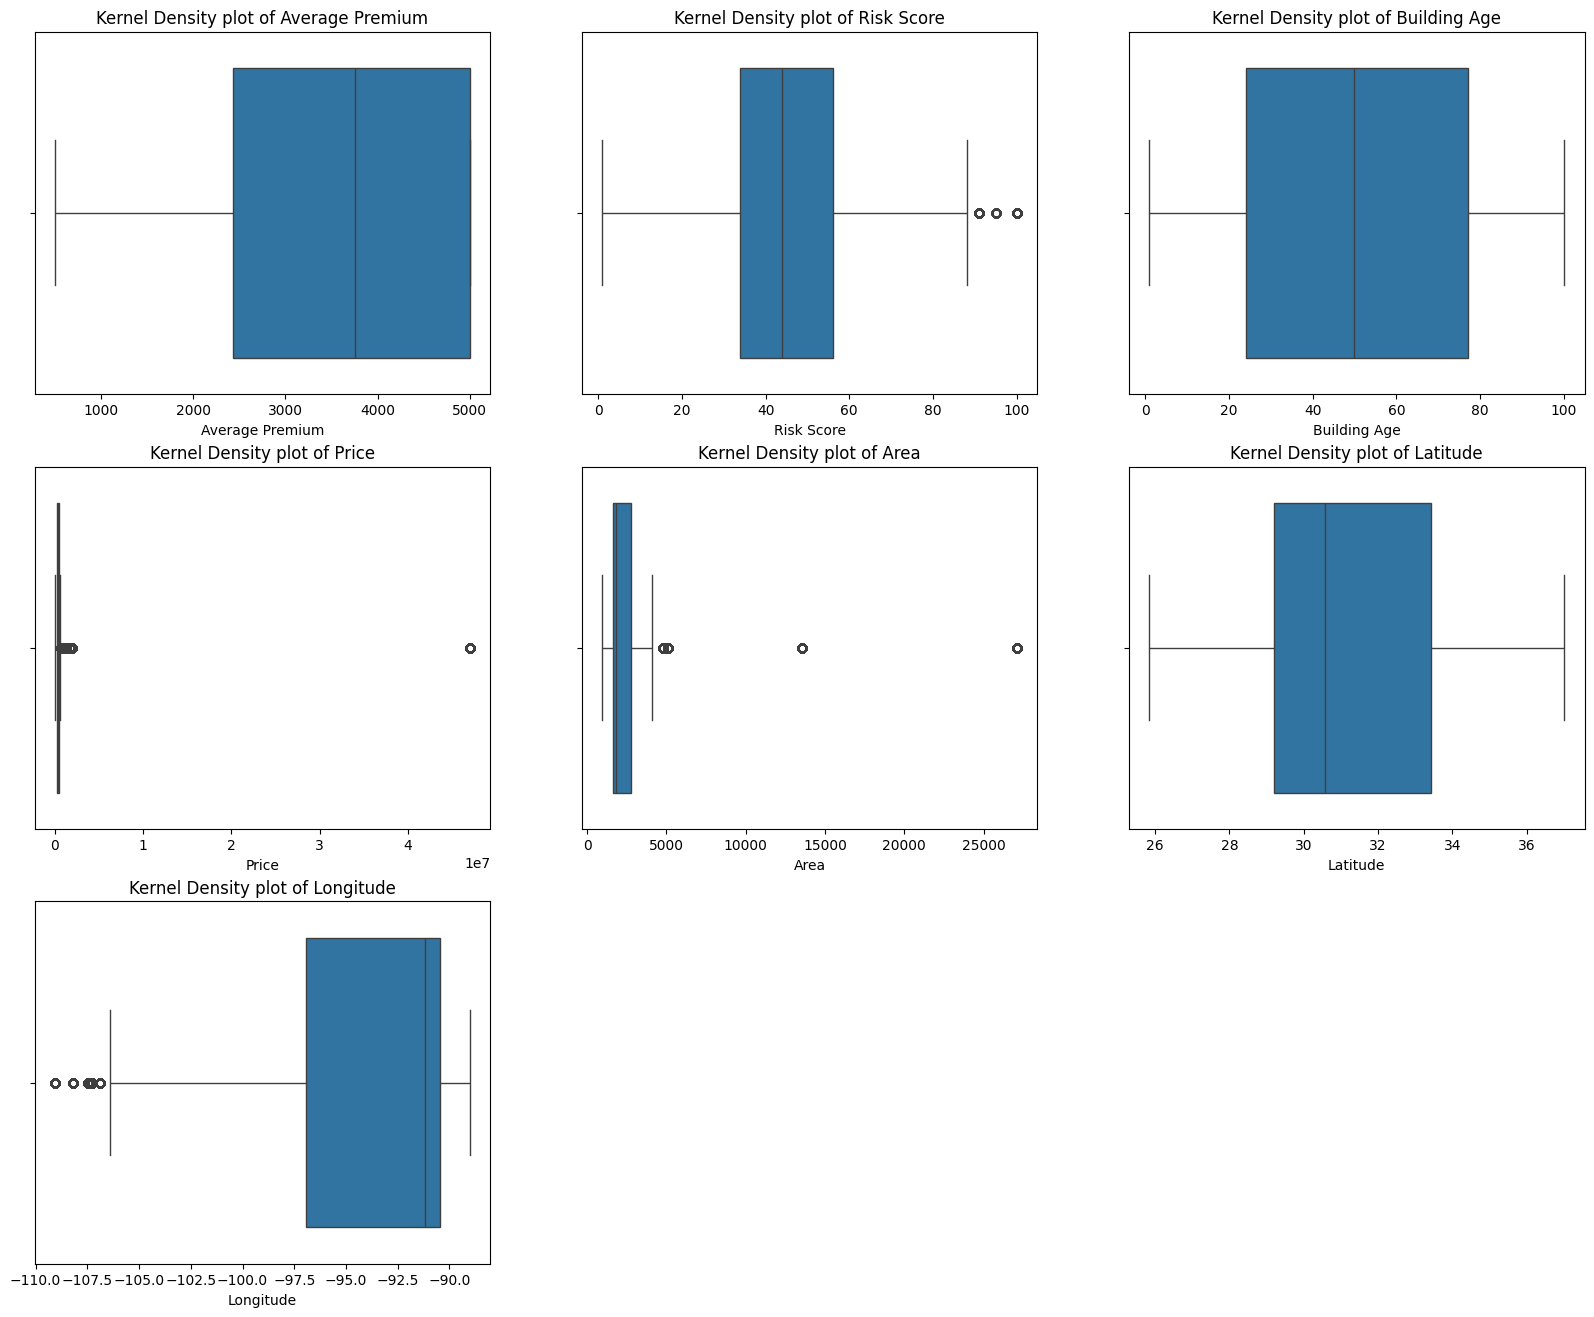

In [12]:
# Now check which column has outliers

num_cols = ["Average Premium", "Risk Score", "Building Age", "Price", "Area", "Latitude", "Longitude"]
fig , ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16))
ax = ax.flatten()

for index, column in enumerate(num_cols):
    sns.boxplot(data=data, x=column, ax=ax[index])
    ax[index].set_title(f"Kernel Density plot of {column}")
    
if len(num_cols) < len(ax):
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

plt.show()

##### Beside average permium, building age and latitude all others have outliers.

## Bi-Variate Analysis

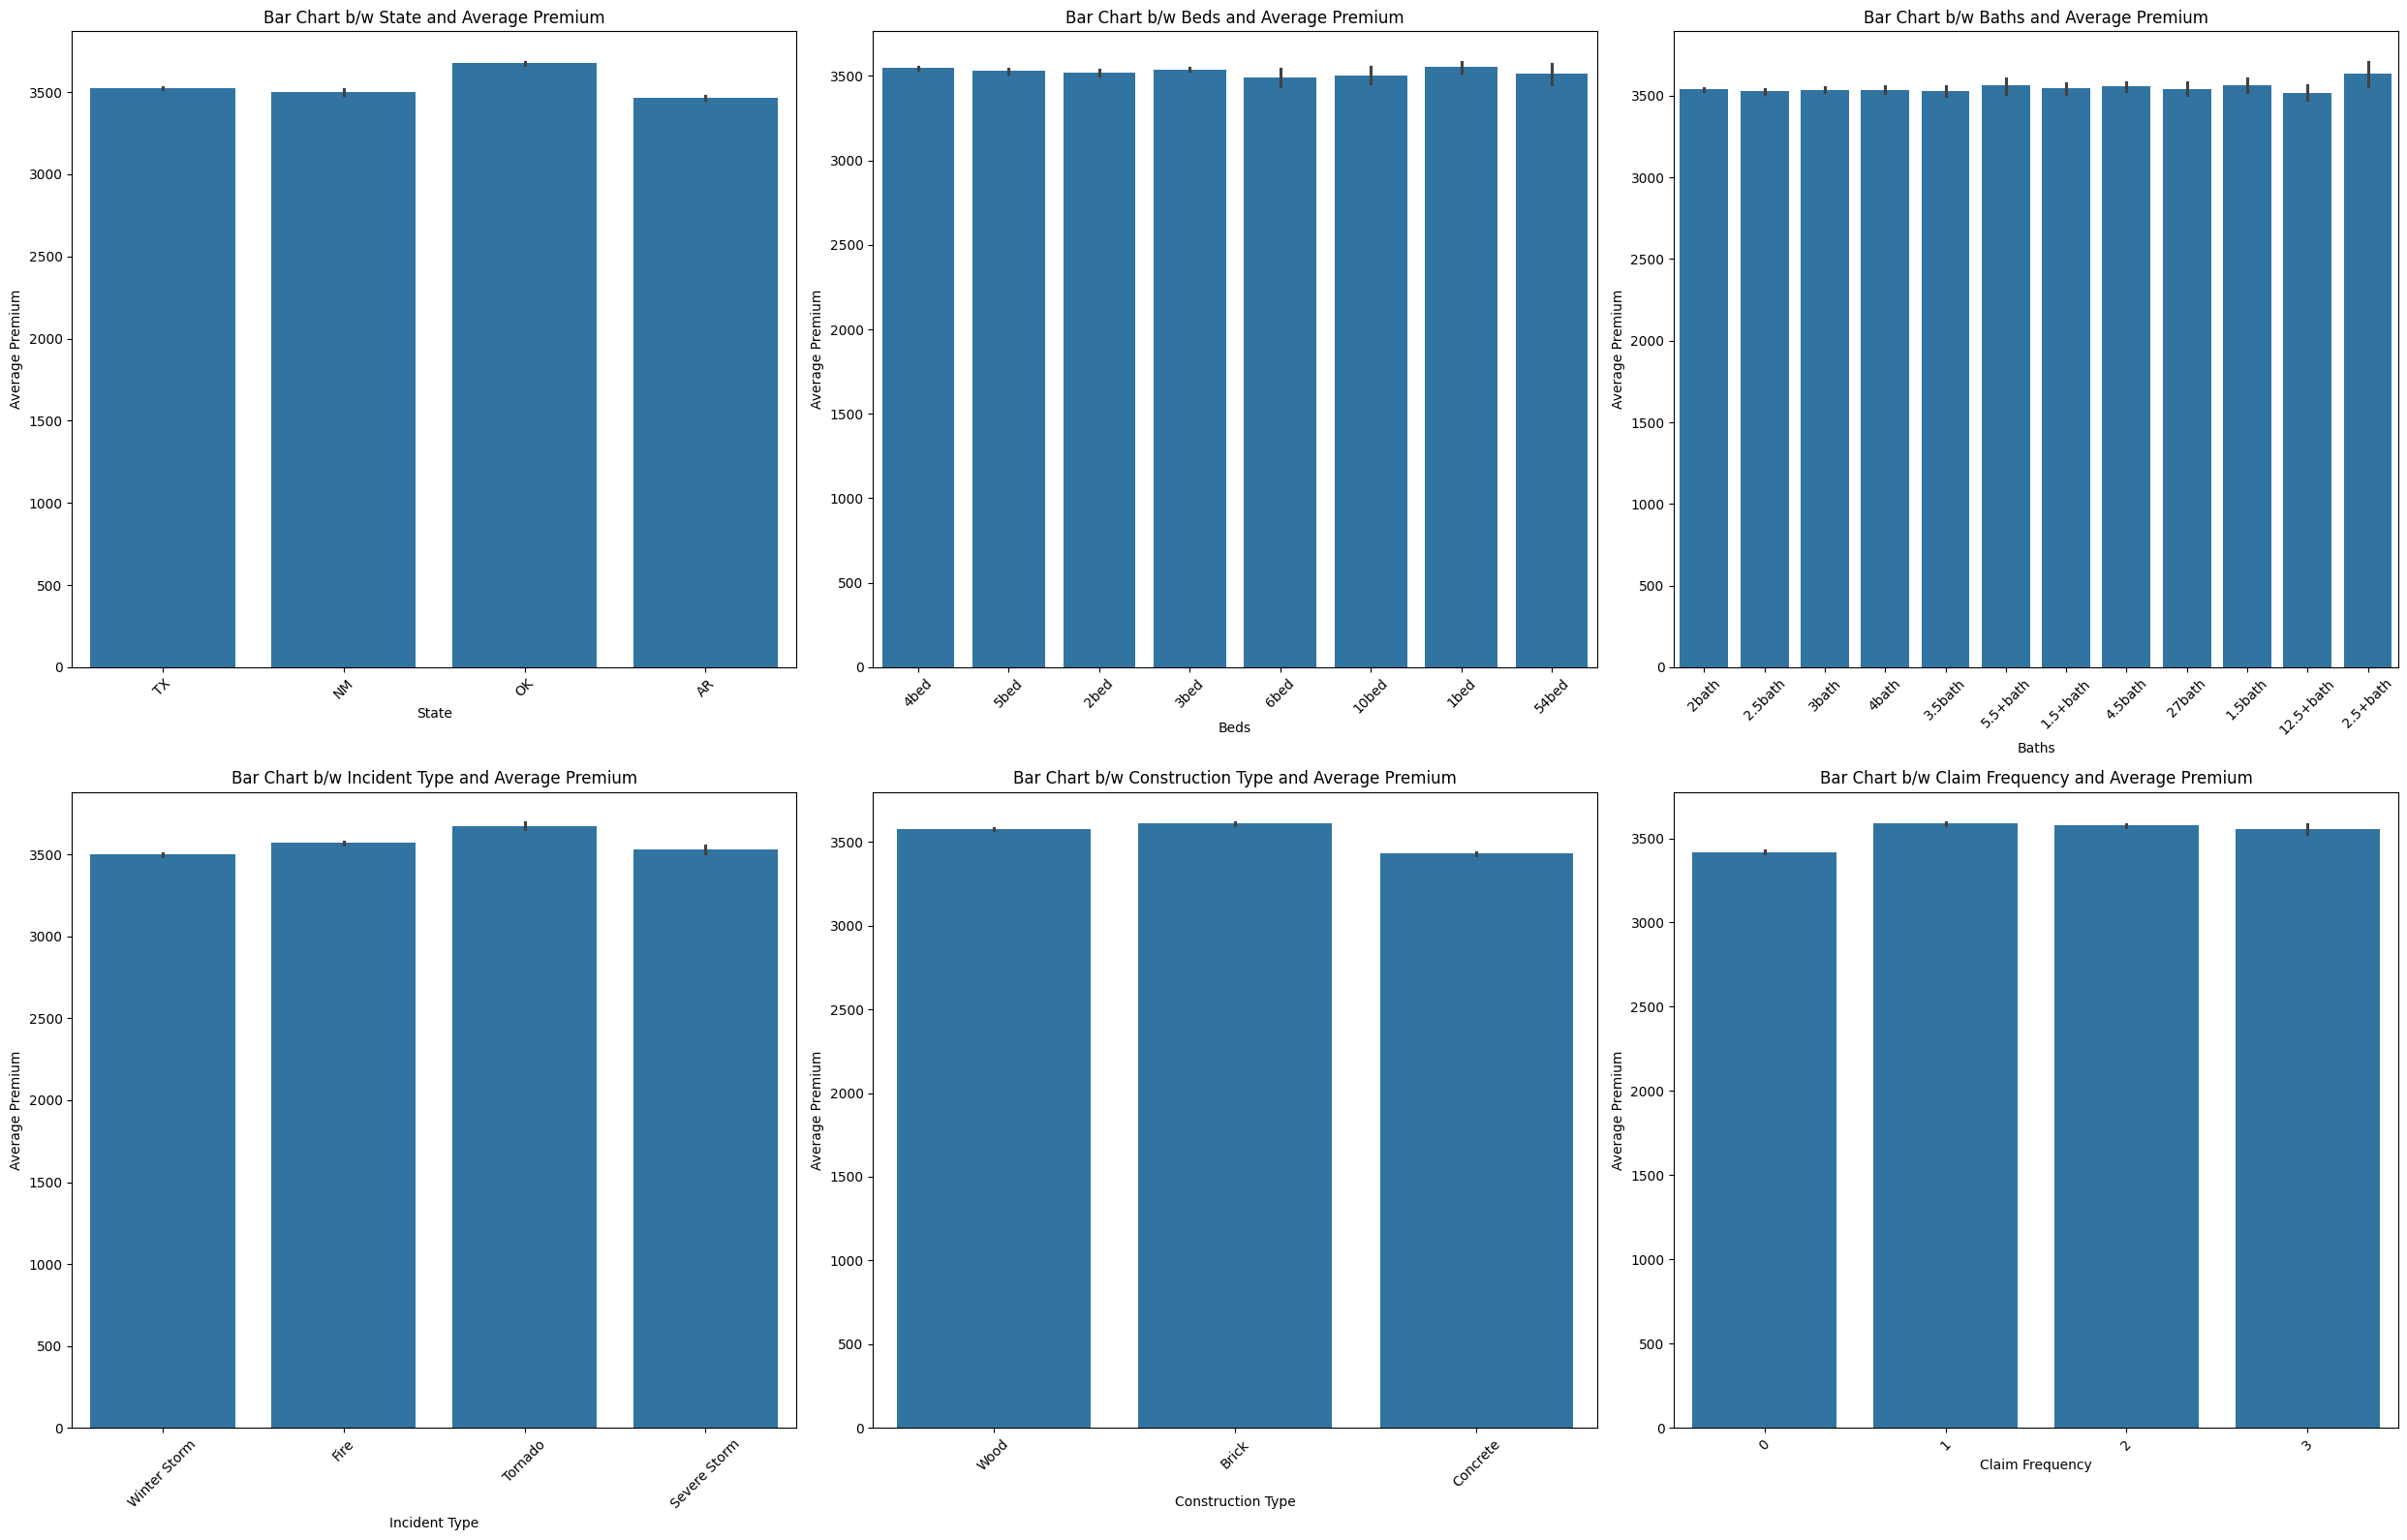

In [13]:
# barchat b/w categorical columns and average premium

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(25, 16))
ax = ax.flatten()

for index, column in enumerate(cat_cols):

    sns.barplot(data=data, x=column, y="Average Premium", ax=ax[index])
    ax[index].set_title(f"Bar Chart b/w {column} and {'Average Premium'}")
    ax[index].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Across all cateogical features premium seems to be same which shows that premium does not dependents on these features for now.

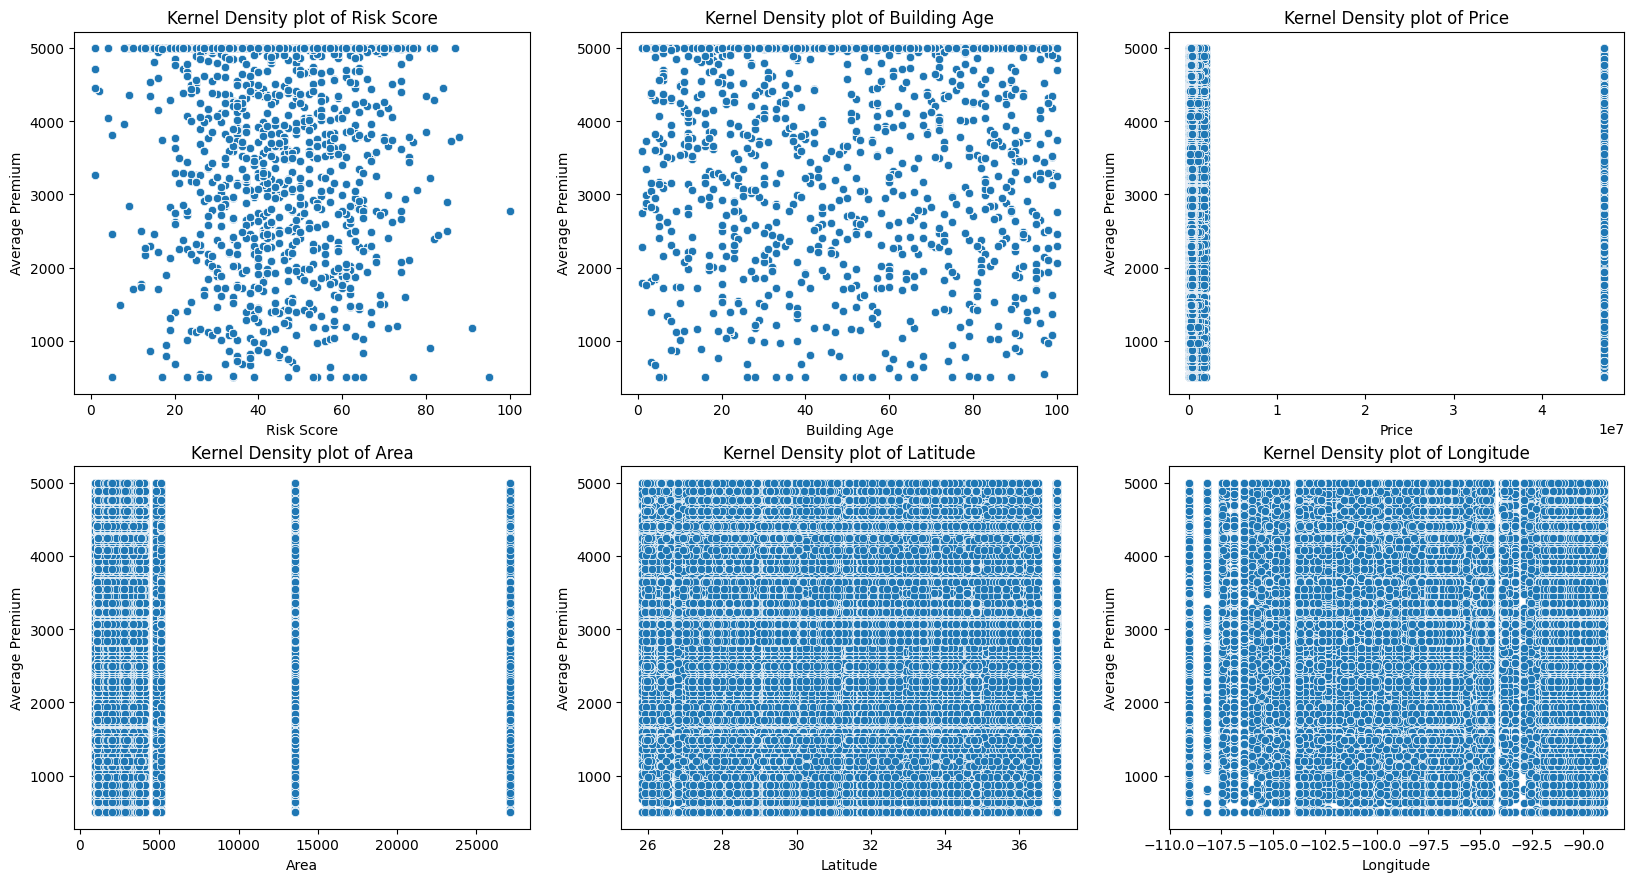

In [14]:
# Now check the correlation b/w all numerical column and average premium
num_cols = ["Risk Score", "Building Age", "Price", "Area", "Latitude", "Longitude"]
fig , ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16))
ax = ax.flatten()

for index, column in enumerate(num_cols):
    sns.scatterplot(data=data, x=column, y="Average Premium", ax=ax[index])
    ax[index].set_title(f"Kernel Density plot of {column}")
    
if len(num_cols) < len(ax):
    for j in range(len(num_cols), len(ax)):
        fig.delaxes(ax[j])

plt.show()

#### No specific patterning is found b/w these columns

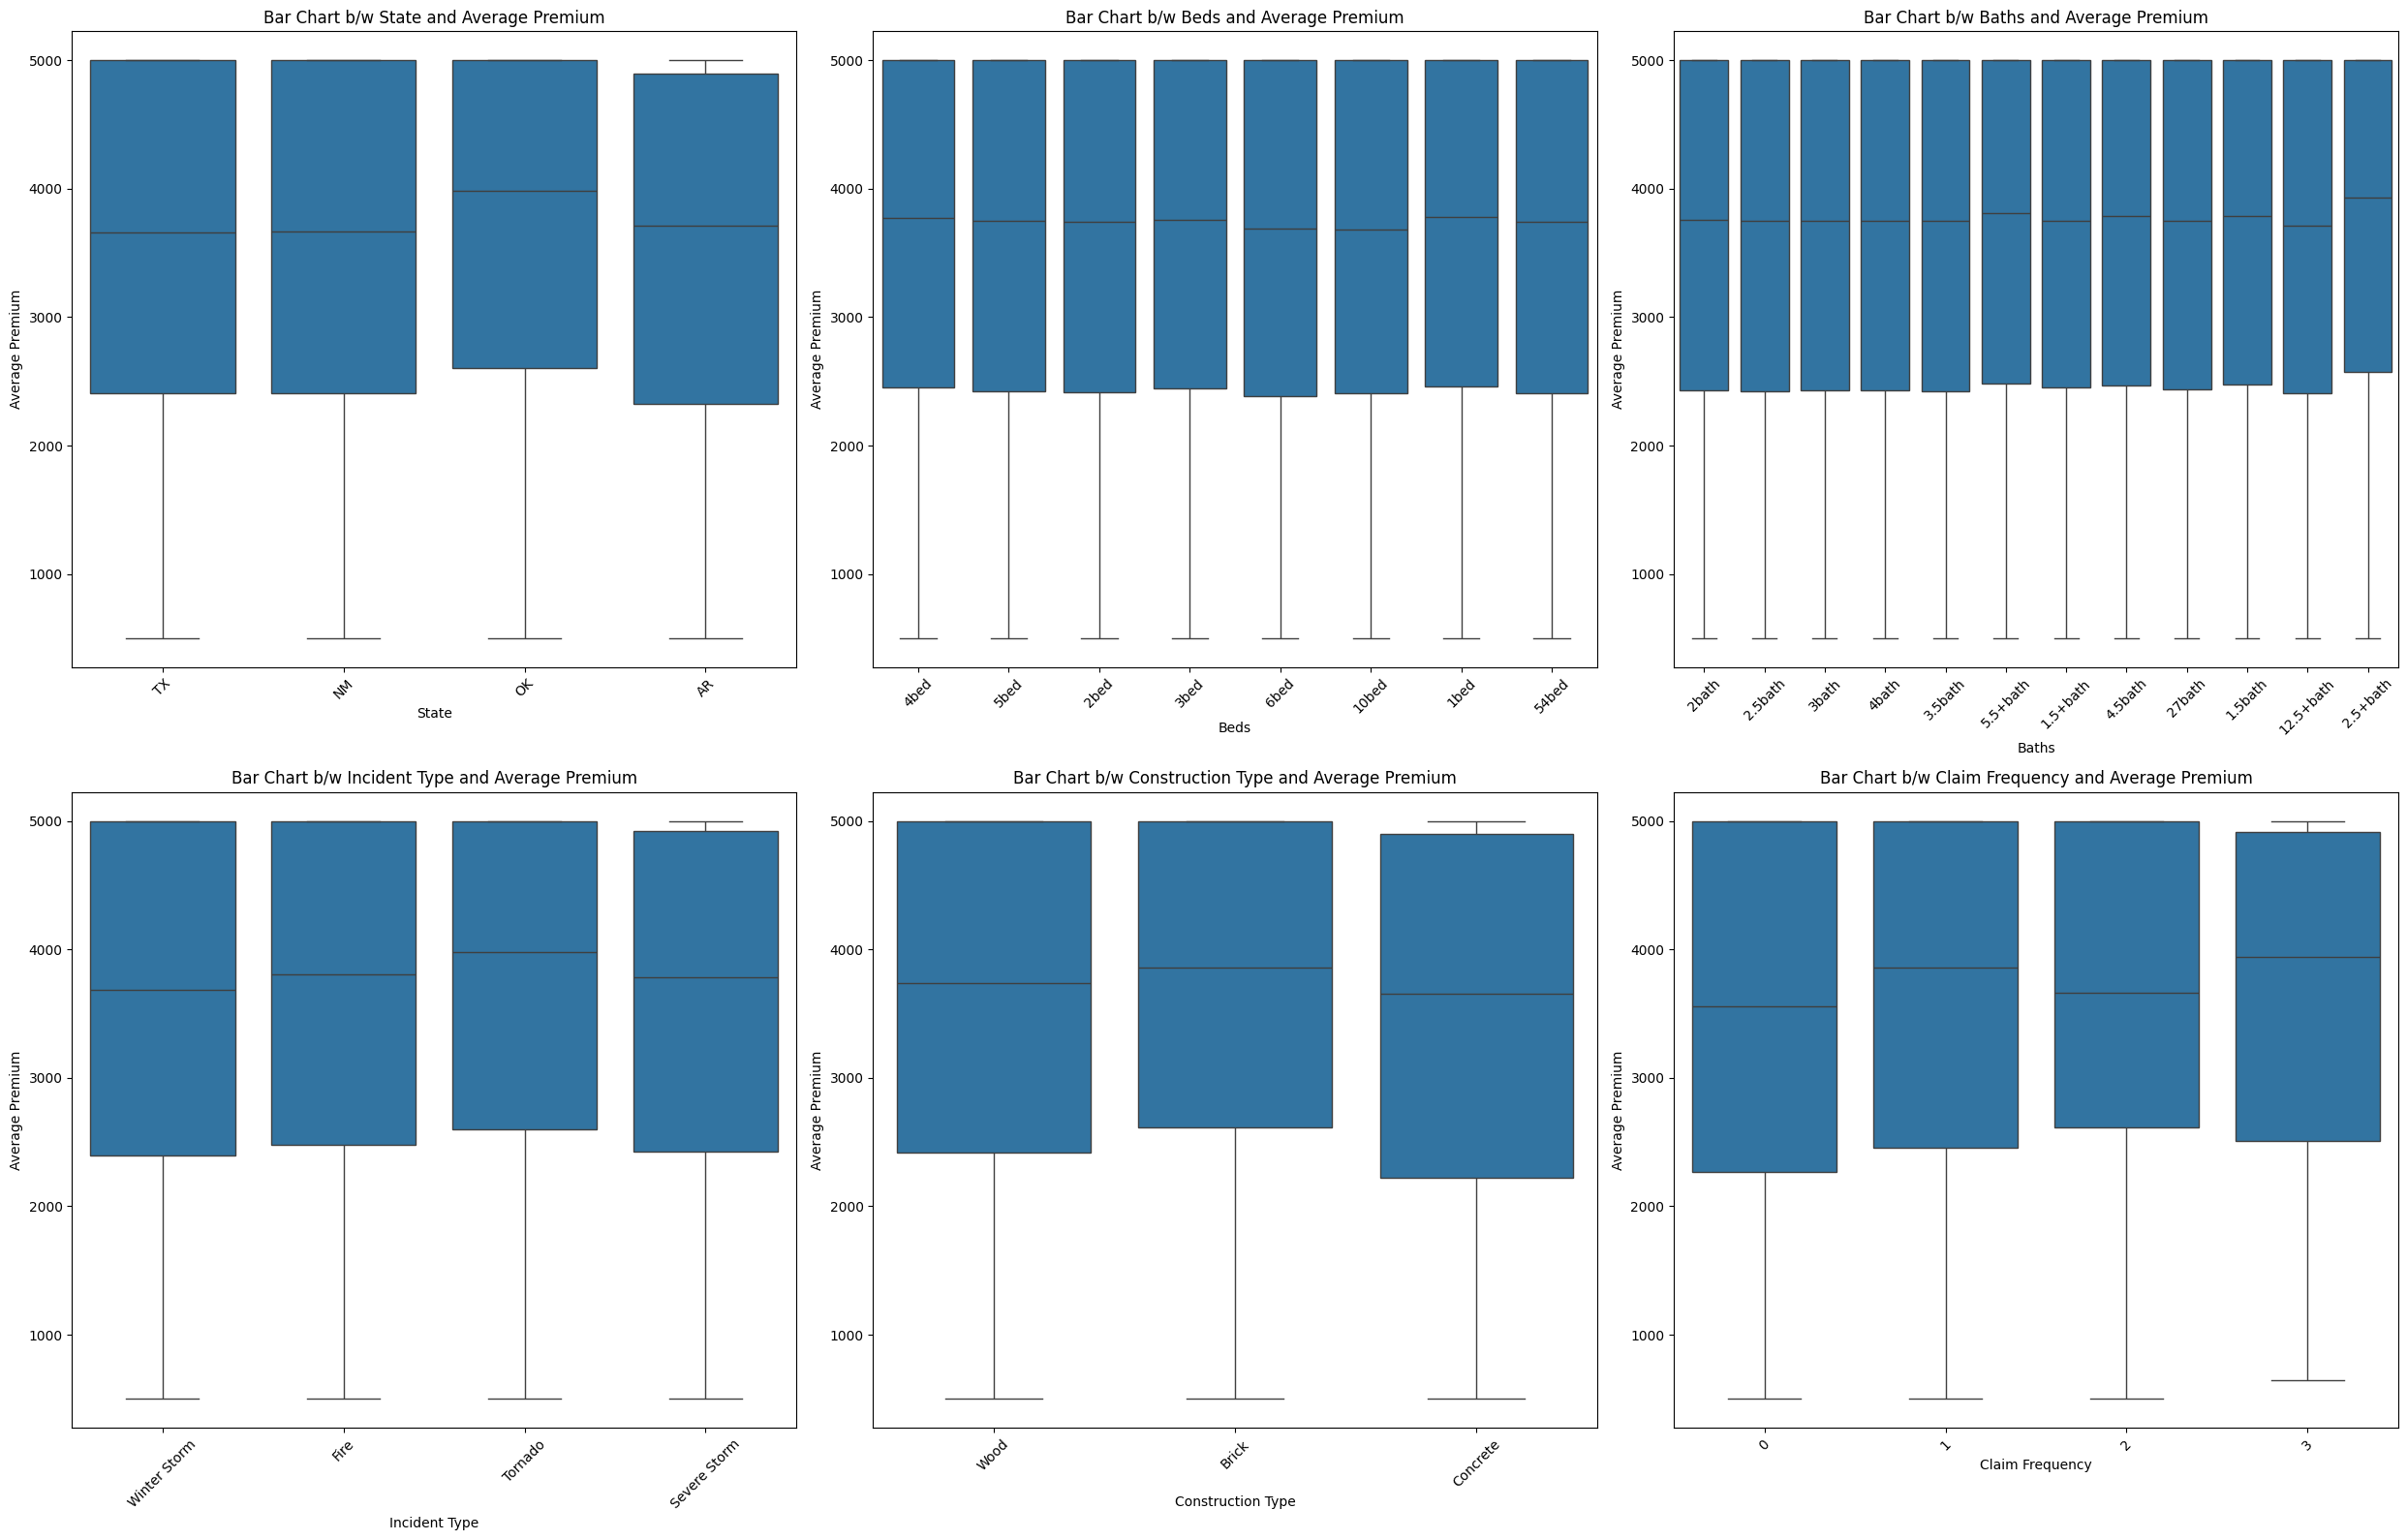

In [15]:
# Now checking the distribution of each distribution (median, quartiles and outliers) accros each categorical feature.

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(25, 16))
ax = ax.flatten()

for index, column in enumerate(cat_cols):

    sns.boxplot(data=data, x=column, y="Average Premium", ax=ax[index])
    ax[index].set_title(f"Bar Chart b/w {column} and {'Average Premium'}")
    ax[index].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### All the categories of categorical features seems to be skewed b/w 25000-5000.

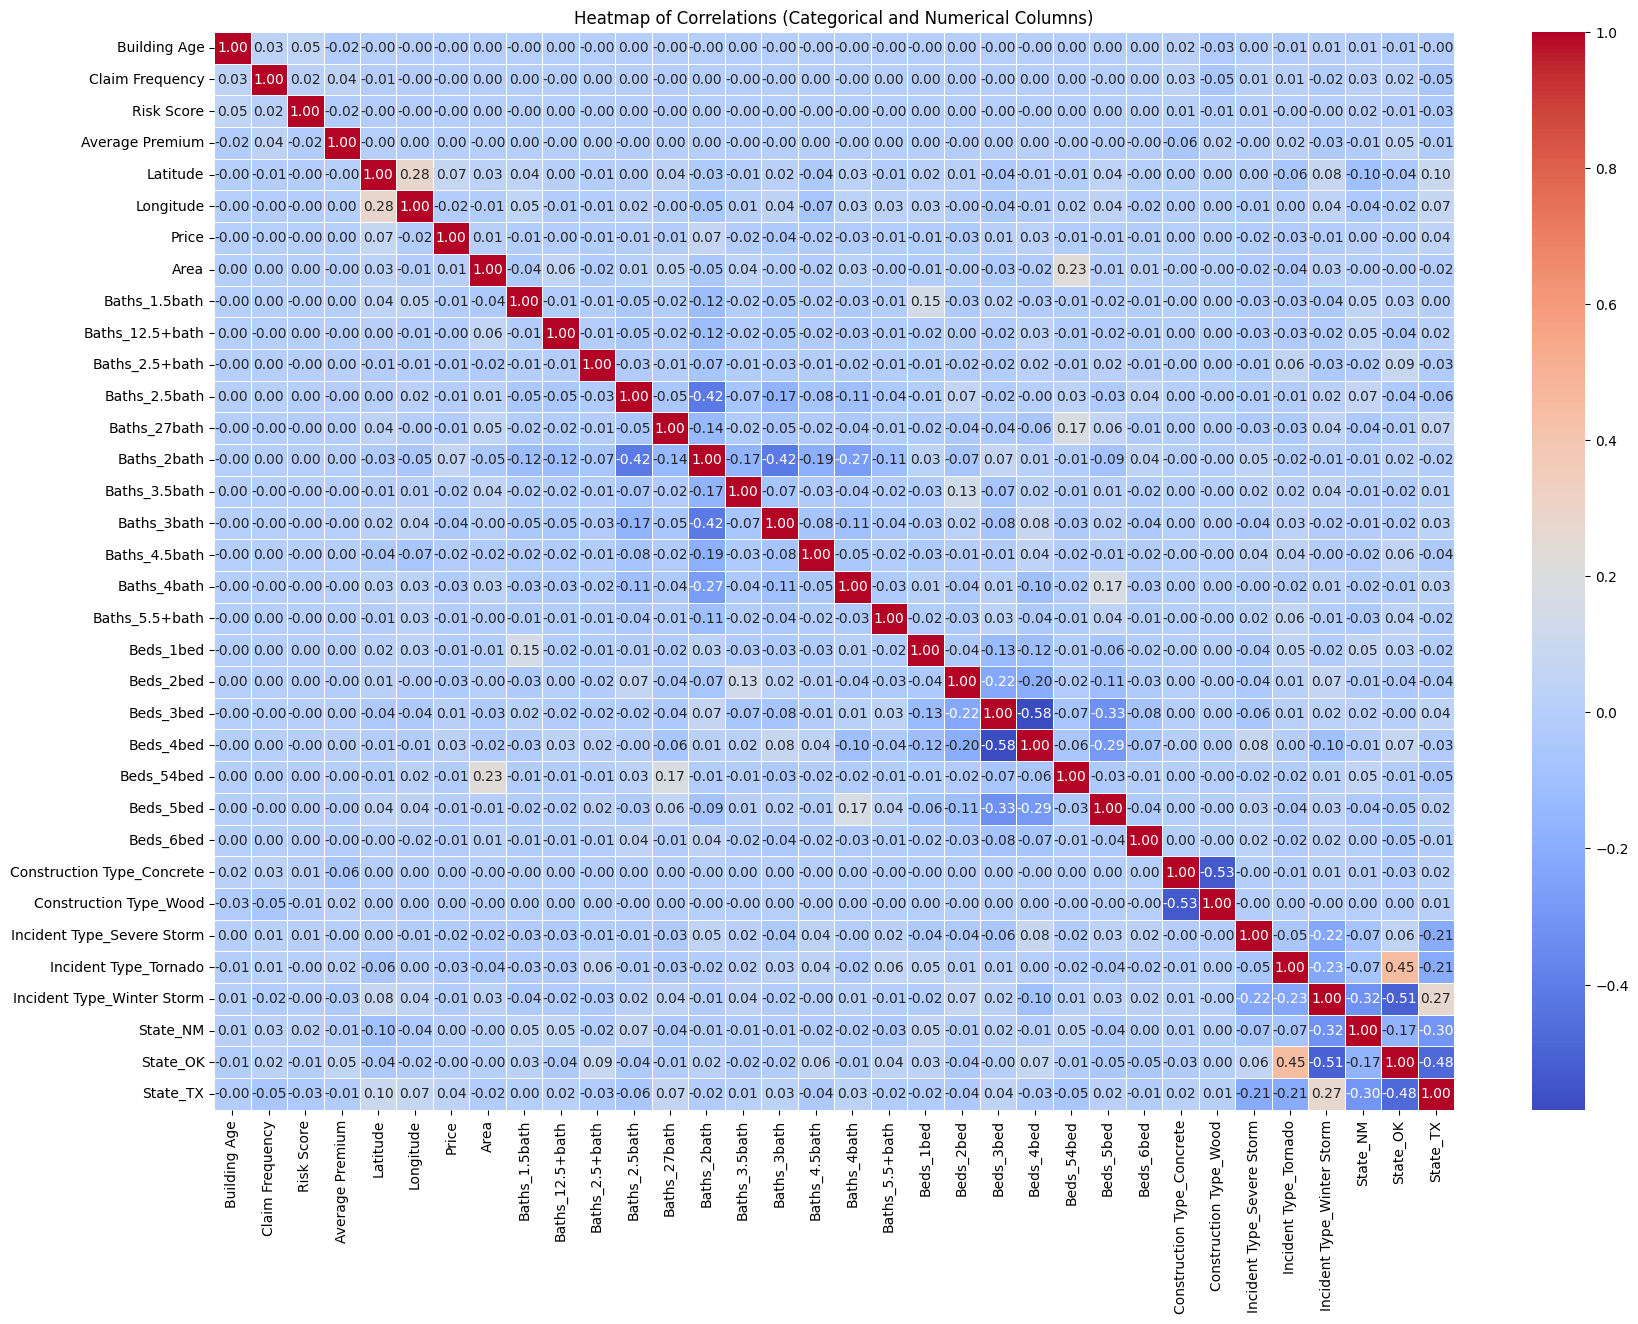

In [16]:
# Make a copy of the dataset
data_copy = data.copy()

# 1. Identify categorical and numerical columns
cat_cols = data_copy.select_dtypes(include=['object', 'category']).columns
num_cols = data_copy.select_dtypes(include=['number']).columns

# Drop unwanted columns from categorical columns list
cat_cols = cat_cols.difference(["Incident Begin Date", "Incident End Date", "Address"])

# 2. Apply One-Hot Encoding to categorical columns
data_encoded = pd.get_dummies(data_copy[cat_cols], drop_first=True)

# 3. Concatenate the numerical columns with the encoded categorical columns
data_combined = pd.concat([data_copy[num_cols], data_encoded], axis=1)

# 4. Compute the correlation matrix
corr_matrix = data_combined.corr()

# 5. Plot the heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations (Categorical and Numerical Columns)")
plt.show()

#### Conclusion:
1. No such high correlation is found.
2. OK is 0.45 correlated with incident type tornado.
3. TX is -0.21 with both incident type severe_storm and winter_storm.
4. ok is -0.51 with winter_storm.
5. NM is -0.32 with winter_storm.

## MultiVariate Analysis

In [17]:
# Convert date columns to datetime
data["Incident Begin Date"] = pd.to_datetime(data["Incident Begin Date"])
data["Incident End Date"] = pd.to_datetime(data["Incident End Date"])

# Calculate duration in days
data["Incident Duration"] = (data["Incident End Date"] - data["Incident Begin Date"]).dt.days

In [18]:
# Convert date columns to datetime
data["Incident Begin Date"] = pd.to_datetime(data["Incident Begin Date"])
data["Incident End Date"] = pd.to_datetime(data["Incident End Date"])

# Calculate duration in days
data["Incident Duration"] = (data["Incident End Date"] - data["Incident Begin Date"]).dt.days

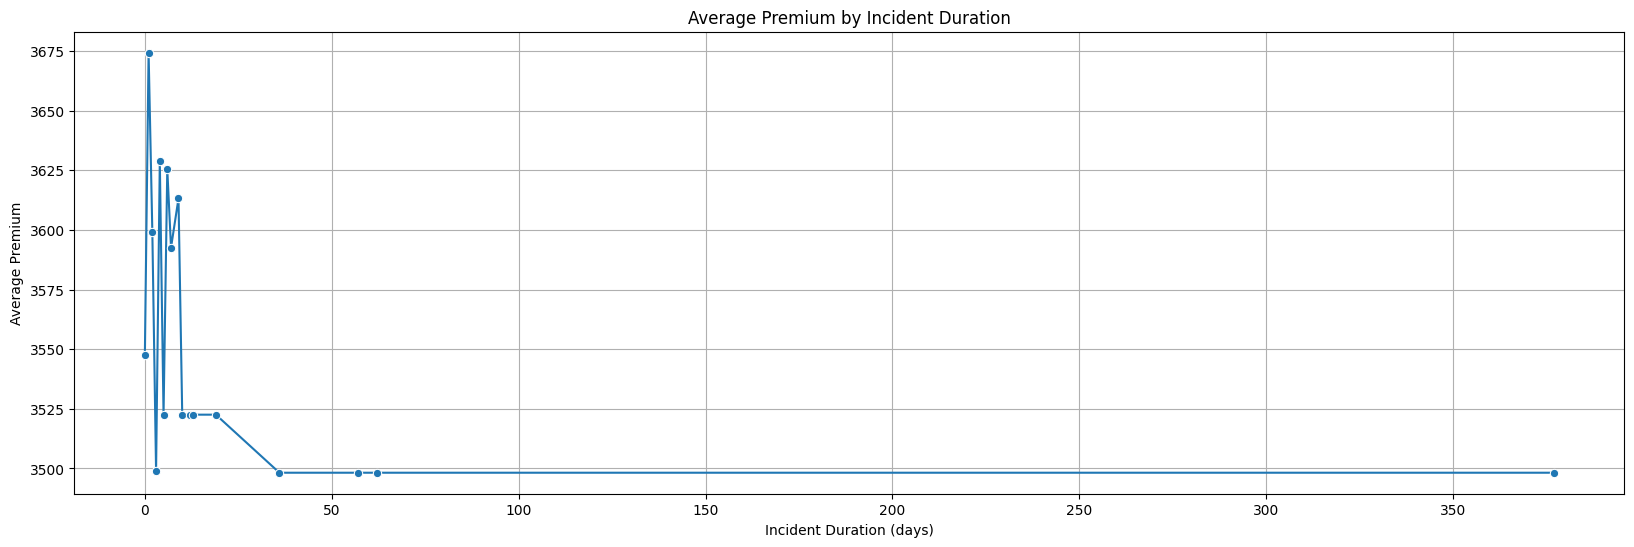

In [29]:
# Group by Incident Duration and calculate mean Average Premium
grouped_data = data.groupby("Incident Duration")["Average Premium"].mean().reset_index()

# Plot
plt.figure(figsize=(20, 6))
sns.lineplot(x="Incident Duration", y="Average Premium", data=grouped_data, marker='o')
plt.title("Average Premium by Incident Duration")
plt.xlabel("Incident Duration (days)")
plt.ylabel("Average Premium")
plt.grid(True)
plt.show()

- Permium are high above 3500 when incident is b/w 0-20 days almost after maybe 30 decrease then drop below 3500.

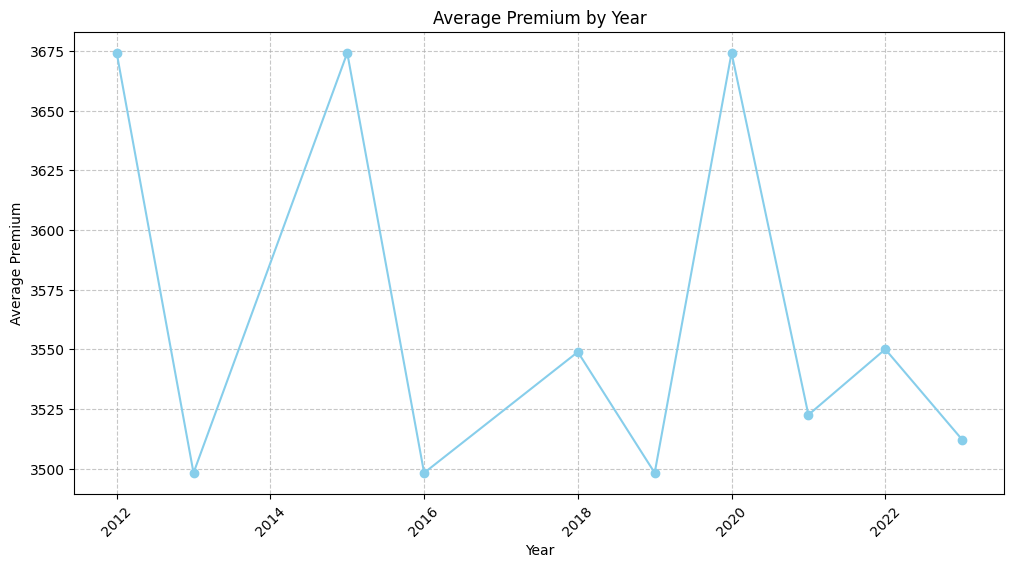

In [20]:
# now lets check if premium decreases or increases with years
# if varies it shows potential seasonal economic factors etc.

# Convert 'Incident Begin Date' to datetime
data["Incident Begin Date"] = pd.to_datetime(data["Incident Begin Date"])

# Extract year from 'Incident Begin Date'
data["Year"] = data["Incident Begin Date"].dt.year

# calculate the average premium for each year
average_premium_by_year = data.groupby("Year")["Average Premium"].mean()

# Plot
plt.figure(figsize=(12, 6))

# Line plot to visualize average premium by year
plt.plot(average_premium_by_year.index, average_premium_by_year, marker='o', linestyle='-', color='skyblue')

plt.xlabel('Year')
plt.ylabel('Average Premium')
plt.title('Average Premium by Year')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

- The trend indicates that premium were low in 2023 and vai pattern they will be high in 2024.

In [21]:
data.columns

Index(['State', 'Building Age', 'Claim Frequency', 'Risk Score',
       'Average Premium', 'Construction Type', 'Latitude', 'Longitude',
       'Incident Type', 'Incident Begin Date', 'Incident End Date', 'Price',
       'Beds', 'Baths', 'Area', 'Address', 'Incident Duration', 'Year'],
      dtype='object')

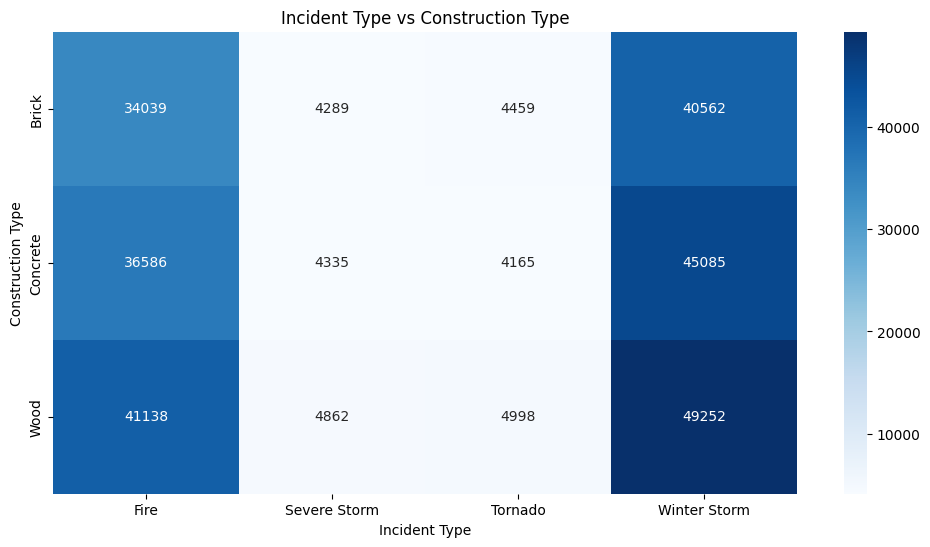

In [22]:
# Cross-tabulation to check which Construction Type is more affected by which Incident Type
incident_vs_construction = pd.crosstab(data["Construction Type"], data["Incident Type"])

# Plot the cross-tabulated data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(incident_vs_construction, annot=True, cmap='Blues', fmt='g')
plt.title('Incident Type vs Construction Type')
plt.ylabel('Construction Type')
plt.xlabel('Incident Type')
plt.show()

### Conclusions
1. This indicates that fire and winter storm mostly causing damage and wooden one's are getting effected by it most.

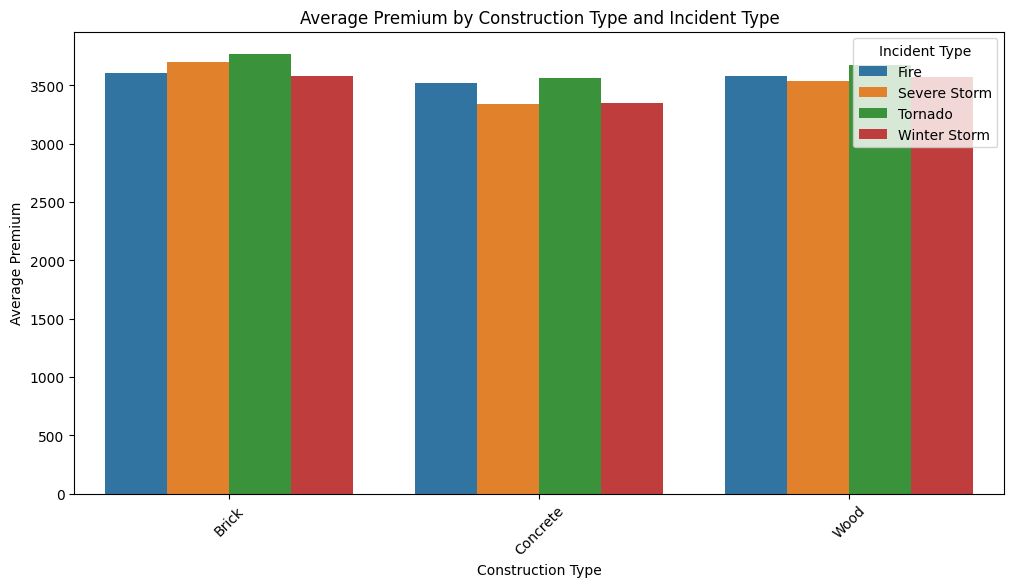

In [23]:
# Group by Construction Type and Incident Type, calculating the mean of Average Premium
grouped_data = data.groupby(["Construction Type", "Incident Type"])["Average Premium"].mean().reset_index()

# Plotting the data using seaborn's catplot for a multi-category bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Construction Type", y="Average Premium", hue="Incident Type", data=grouped_data)
plt.title("Average Premium by Construction Type and Incident Type")
plt.xlabel("Construction Type")
plt.ylabel("Average Premium")
plt.xticks(rotation=45)
plt.show()

#### Conclusion
1. On average Bricks made houses are getting more premiums.
2. Houses effected by tornado are getting more premiums.

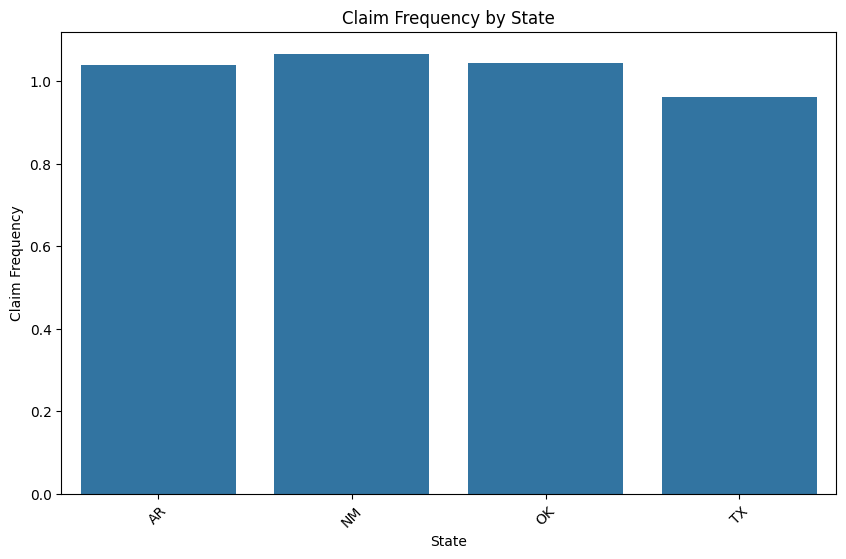

In [30]:
# Group by State and calculate mean Claim Frequency
grouped_data = data.groupby("State")["Claim Frequency"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Claim Frequency", data=grouped_data)
plt.title("Claim Frequency by State")
plt.xlabel("State")
plt.ylabel("Claim Frequency")
plt.xticks(rotation=45)
plt.show()


#### On average claim ferquency is slightly more in New-Mexico then others and Texas has the lowest.

In [26]:
data = data.drop(columns=["Incident Begin Date", "Incident End Date"],axis=1)

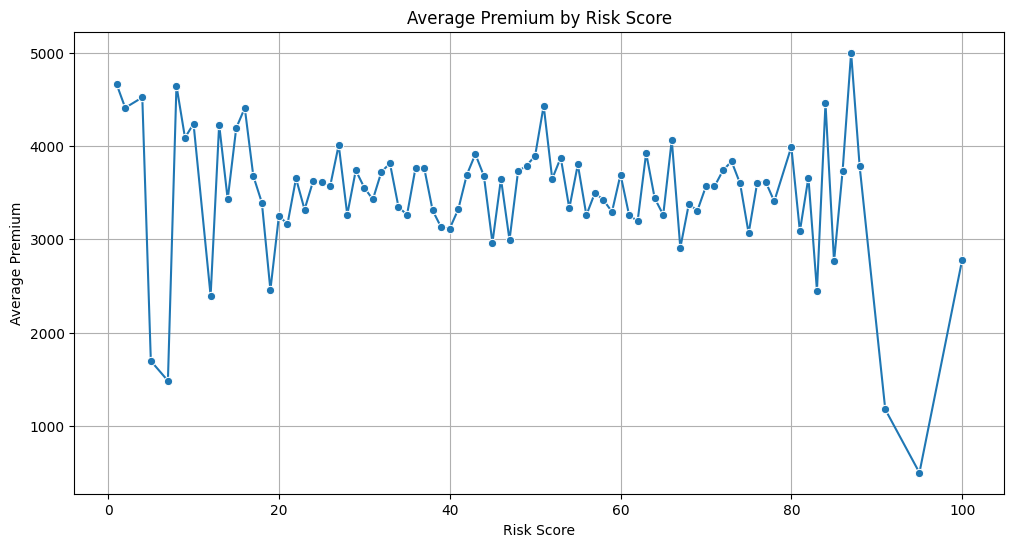

In [32]:
# let's Investigate how the average premium varies with different risk scores.

grouped_data = data.groupby("Risk Score")["Average Premium"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Risk Score", y="Average Premium", data=grouped_data, marker='o')
plt.title("Average Premium by Risk Score")
plt.xlabel("Risk Score")
plt.ylabel("Average Premium")
plt.grid(True)
plt.show()

* b/w 10-80 it is within 3000-4000 below ten is very to and more then 80 and less then 90 is max after that it reduces to less then 1k (indicating outliers).

In [ ]:
# add more things if needed in eda